In [2]:
from analysing_xi import *
import numpy as np

In [3]:
def get_analysing_xi_obj(N,x,xi_mpo,xi_mps):
    print("N: ",N)
    print("x: ",x)
    print("xi_mpo: ",xi_mpo)
    print("xi_mps: ",xi_mps)
    print("this is the debug version of get_analysing_xi_obj")
    n_samples = 10**3
    len_a = 2*int(np.ceil(np.log2(N)))+3

    
    cx_mpos, tim_create_mpos  = gts.cx_pow_2k_mod_N_mpo_mpo(N,x,len_a,xi_mpo)
    

    xi_max_in_mpos = [mpo.maximum_bond_dim() for mpo in cx_mpos]

    cx_mpos[-1].plot_schmidt_values()

    mps , len_a, tim_before_fourier = get_shor_mpo(N,x,xi_mps,cx_mpos)

    psi = mps.measure_subspace(0,len_a)
    print(np.sum(psi),"total probability")

    tim_after_fourier = tim.Tim()
    
    mps = circ.fourier_transform_MPO(mps,len_a,inv=True)
    xi_max_in_mps = mps.maximum_bond_dim()
    
    tim_after_fourier.print_since_last("Fourier transform")

    psi = mps.measure_subspace(0,len_a)
    print(np.sum(psi),"total probability")

    samples =  mps.sample_range(0,len_a,n_samples)

    tim_after_fourier.print_since_last("Sampling")

    p_success_mpo = sh.success_prob_measurement_samples(samples,x,N,invert=True)
    print("p_success_mpo: ",p_success_mpo)
    
    return analysing_xi_obj(N,
                            x,
                            xi_mpo,
                            xi_mps,
                            p_success_mpo,
                            samples,
                            tim_create_mpos,
                            tim_before_fourier,
                            tim_after_fourier,
                            xi_max_in_mpos,
                            xi_max_in_mps), psi

In [ ]:
def get_analysing_xi_obj(N,x,xi_mpo,xi_mps):    
    print("N: ",N)
    print("x: ",x)
    print("xi_mpo within object: ",xi_mpo)
    print("xi_mps within object: ",xi_mps)
    n_samples = 10**4
    len_a = 2*int(np.ceil(np.log2(N)))+3

    
    cx_mpos, tim_create_mpos  = gts.cx_pow_2k_mod_N_mpo_mpo(N,x,len_a,xi_mpo)
    

    xi_max_in_mpos = [mpo.maximum_bond_dim() for mpo in cx_mpos]
    xi_max_in_mpos_zip_up = [mpo.largest_xi_during_zip_up for mpo in cx_mpos]
    

    mps , len_a, tim_before_fourier = get_shor_mpo(N,x,xi_mps,cx_mpos)
    xi_max_in_mps = mps.maximum_bond_dim()

    tim_after_fourier = tim.Tim()
    new = mps.collapse_subspace(len_a,mps.L)
    tim_after_fourier.print_since_last("Collapse subspace")

    new = circ.fourier_transform_MPS(new,len_a,inv=True)
    
    tim_after_fourier.print_since_last("Fourier transform")

    samples =  new.sample_range(0,len_a,n_samples)

    tim_after_fourier.print_since_last("Sampling")

    p_success_mpo = sh.success_prob_measurement_samples(samples,x,N,invert=False)
    print("p_success_mpo: ",p_success_mpo)

N:  15
x:  7
xi_mpo:  18
xi_mps:  16
this is the debug version of get_analysing_xi_obj
copy 7.867813110351562e-05
merge 0.006384372711181641
append 8.916854858398438e-05
copy 0.0006794929504394531
merge 0.013431787490844727
append 0.00011396408081054688
copy 0.00016045570373535156
merge 0.01339578628540039
append 0.00038051605224609375
copy 9.512901306152344e-05
merge 0.011565446853637695
append 0.0003876686096191406
copy 9.5367431640625e-05
merge 0.011259078979492188
append 0.0003578662872314453
copy 8.916854858398438e-05
merge 0.011267662048339844
append 0.0003592967987060547
copy 8.749961853027344e-05
merge 0.011301040649414062
append 0.00035691261291503906
copy 8.845329284667969e-05
merge 0.011093854904174805
append 0.00035381317138671875
copy 8.678436279296875e-05
merge 0.009094953536987305
append 0.0003619194030761719
copy 8.845329284667969e-05
merge 0.009057760238647461
append 0.0003533363342285156
total 0.0003097057342529297


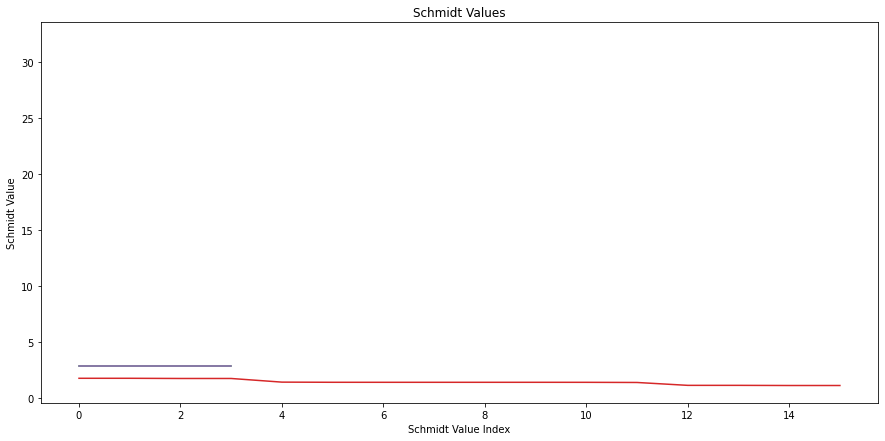

MPS initialized in 0.0003230571746826172
MPO applied in 0.0026671886444091797
SWAP gates applied in 0.0013303756713867188
MPO applied in 0.003100156784057617
SWAP gates applied in 0.0012366771697998047
MPO applied in 0.002118349075317383
SWAP gates applied in 0.0011665821075439453
MPO applied in 0.0021011829376220703
SWAP gates applied in 0.0010156631469726562
MPO applied in 0.002106904983520508
SWAP gates applied in 0.0009036064147949219
MPO applied in 0.0020585060119628906
SWAP gates applied in 0.0008862018585205078
MPO applied in 0.0021228790283203125
SWAP gates applied in 0.0005381107330322266
MPO applied in 0.0021829605102539062
SWAP gates applied in 0.00042557716369628906
MPO applied in 0.0021376609802246094
SWAP gates applied in 0.0003120899200439453
MPO applied in 0.0021843910217285156
SWAP gates applied in 0.0008652210235595703
MPO applied in 0.002112150192260742
SWAP gates applied in 0.0002739429473876953
Control U gates applied in 0.034978628158569336
Total time before inver

ValueError: probabilities do not sum to 1

<Figure size 432x288 with 0 Axes>

In [20]:
ana_obj, psi =  get_analysing_xi_obj(15,7,18,16)

In [26]:
cx_mpos, tim_create_mpos  = gts.cx_pow_2k_mod_N_mpo_mpo(15,7,11,18)
ten = cx_mpos[-1].get_contracted_tensor_in_readable_form()
print(np.diag(np.matmul(ten,ten.conj().T)))


copy 6.866455078125e-05
merge 0.005682706832885742
append 4.887580871582031e-05
copy 5.698204040527344e-05
merge 0.01405191421508789
append 0.00011277198791503906
copy 0.0007414817810058594
merge 0.013881206512451172
append 8.940696716308594e-05
copy 0.0006093978881835938
merge 0.01277780532836914
append 9.679794311523438e-05
copy 0.0006394386291503906
merge 0.012115240097045898
append 0.0003857612609863281
copy 8.916854858398438e-05
merge 0.012100934982299805
append 0.0003800392150878906
copy 8.845329284667969e-05
merge 0.012367963790893555
append 0.00040531158447265625
copy 9.226799011230469e-05
merge 0.011977672576904297
append 0.0003809928894042969
copy 8.869171142578125e-05
merge 0.00970602035522461
append 0.00037932395935058594
copy 8.7738037109375e-05
merge 0.00974583625793457
append 0.0003752708435058594
total 0.0003235340118408203
[0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+00+0.j 0.00000000e+00+0.j
 0.00000000e+00+0.j 0.00000000e+

In [32]:
ten = cx_mpos[8].get_contracted_tensor_in_readable_form()
print(np.diag(np.matmul(ten,ten.conj().T)))


[3.06685897e-30+0.j 2.81857625e-49+0.j 1.41199644e-47+0.j
 7.97626311e-26+0.j 7.60867913e-51+0.j 1.33227863e-46+0.j
 1.25417023e-25+0.j 1.47019917e-47+0.j 1.46995075e-47+0.j
 1.25417023e-25+0.j 1.33227040e-46+0.j 7.60885051e-51+0.j
 7.97626311e-26+0.j 1.41196332e-47+0.j 2.81871325e-49+0.j
 3.06685897e-30+0.j 2.39151441e-04+0.j 2.19793051e-23+0.j
 1.10107051e-21+0.j 6.21983220e+00+0.j 5.93359487e-25+0.j
 1.03890068e-20+0.j 9.77992865e+00+0.j 1.14644572e-21+0.j
 1.14625363e-21+0.j 9.77992865e+00+0.j 1.03889191e-20+0.j
 5.93370528e-25+0.j 6.21983220e+00+0.j 1.10102611e-21+0.j
 2.19802125e-23+0.j 2.39151441e-04+0.j]
